# Compare trained NPEs accuracy as a function of $N_{\rm train}$

In [1]:
import numpy as np 
from scipy import stats
from sedflow import obs as Obs
from sedflow import train as Train

In [2]:
from IPython.display import IFrame
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('PDF')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from sbi import utils as Ut
from sbi import inference as Inference

# Load test data

In [4]:
# x = theta_sps
# y = [u, g, r, i, z, sigma_u, sigma_g, sigma_r, sigma_i, sigma_z, z]
x_test, y_test = Train.load_data('test', version=1, sample='flow', params='thetas_unt')

In [5]:
x_test[:,6] = np.log10(x_test[:,6])
x_test[:,7] = np.log10(x_test[:,7])

# calculate KS test p-value for trained  `SEDflow` models

In [6]:
prior_low = [7, 0., 0., 0., 0., 1e-2, np.log10(4.5e-5), np.log10(4.5e-5), 0, 0., -2.]
prior_high = [12.5, 1., 1., 1., 1., 13.27, np.log10(1.5e-2), np.log10(1.5e-2), 3., 3., 1.]
lower_bounds = torch.tensor(prior_low)
upper_bounds = torch.tensor(prior_high)

prior = Ut.BoxUniform(low=lower_bounds, high=upper_bounds, device='cpu')

In [7]:
def pps(anpe_samples, ntest=100, nmcmc=10000): 
    ''' given npe, calculate pp for ntest test data
    '''
    pp_thetas, rank_thetas = [], [] 
    for igal in np.arange(ntest): 
        _mcmc_anpe = anpe_samples[igal]

        pp_theta, rank_theta = [], []
        for itheta in range(_mcmc_anpe.shape[1]): 
            pp_theta.append(stats.percentileofscore(_mcmc_anpe[:,itheta], x_test[igal,itheta])/100.)
            rank_theta.append(np.sum(np.array(_mcmc_anpe[:,itheta]) < x_test[igal,itheta]))
        pp_thetas.append(pp_theta)
        rank_thetas.append(rank_theta)

    pp_thetas = np.array(pp_thetas)
    rank_thetas = np.array(rank_thetas)
    return pp_thetas, rank_thetas

500x10.0 0.003049711680260655
ntrain500000.500x10.0 0.053112711727375306
ntrain200000.500x10.0 0.00041156239166263323
ntrain100000.500x10.0 0.00014732396971907374
ntrain50000.500x10.0 2.888836910069926e-09
[5.31127117e-02 4.11562392e-04 1.47323970e-04 2.88883691e-09]
0.003049711680260655
[5.31127117e-02 4.11562392e-04 1.47323970e-04 2.88883691e-09]
[1.00000000e+00 1.74156502e+01 1.34951246e-01 4.83075075e-02
 9.47249187e-07]


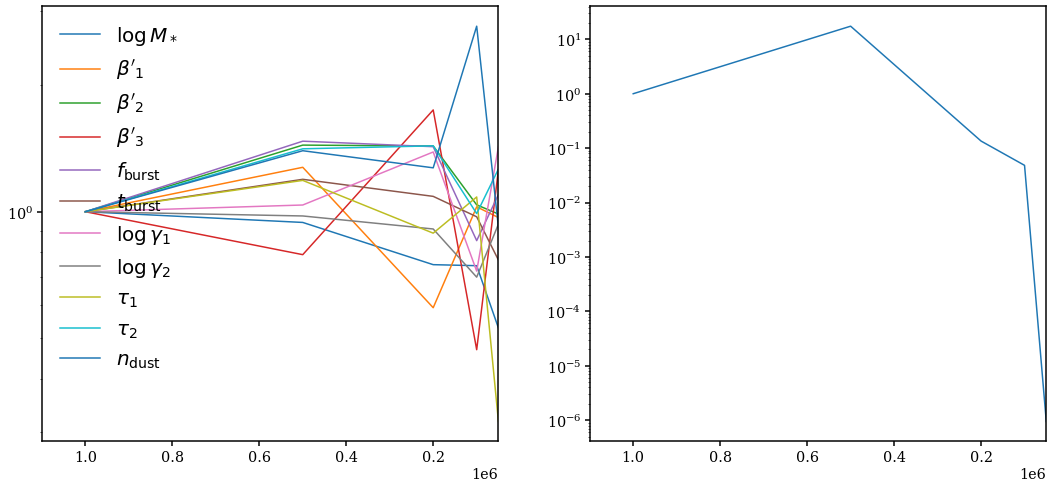

500x10.1 0.003616932381072741
ntrain500000.500x10.1 0.03615153179756403
ntrain200000.500x10.1 2.02661979232094e-09
ntrain100000.500x10.1 0.0003486738986143347
ntrain50000.500x10.1 1.1322238311213214e-05
[3.61515318e-02 2.02661979e-09 3.48673899e-04 1.13222383e-05]
0.003616932381072741
[3.61515318e-02 2.02661979e-09 3.48673899e-04 1.13222383e-05]
[1.00000000e+00 9.99508091e+00 5.60314537e-07 9.64004471e-02
 3.13034282e-03]


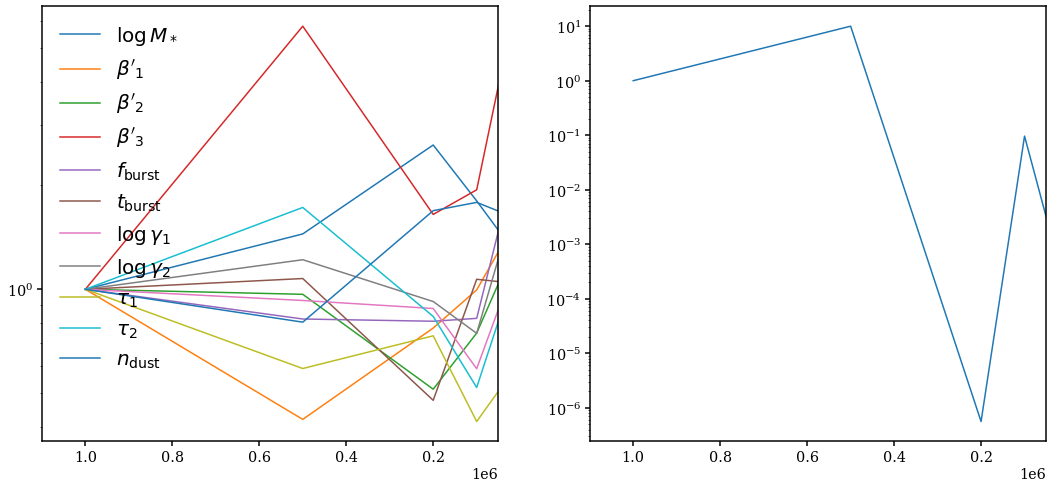

500x10.2 0.021286025502625625
ntrain500000.500x10.2 0.0023429534898804587
ntrain200000.500x10.2 2.605655788854692e-07
ntrain100000.500x10.2 3.107483839045019e-09
ntrain50000.500x10.2 1.9294491413453825e-09
[2.34295349e-03 2.60565579e-07 3.10748384e-09 1.92944914e-09]
0.021286025502625625
[2.34295349e-03 2.60565579e-07 3.10748384e-09 1.92944914e-09]
[1.00000000e+00 1.10070031e-01 1.22411569e-05 1.45987039e-07
 9.06439364e-08]


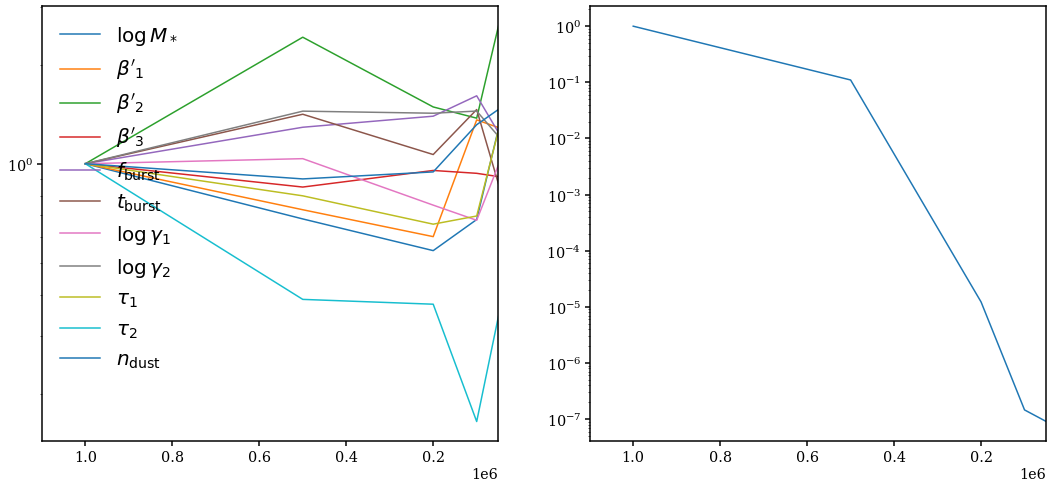

500x10.3 0.002601546739251733
ntrain500000.500x10.3 9.192718129278713e-05
ntrain200000.500x10.3 2.547549330135303e-05
ntrain100000.500x10.3 1.8029138254060425e-08
ntrain50000.500x10.3 6.956128159302859e-09
[9.19271813e-05 2.54754933e-05 1.80291383e-08 6.95612816e-09]
0.002601546739251733
[9.19271813e-05 2.54754933e-05 1.80291383e-08 6.95612816e-09]
[1.00000000e+00 3.53355871e-02 9.79244113e-03 6.93016119e-06
 2.67384324e-06]


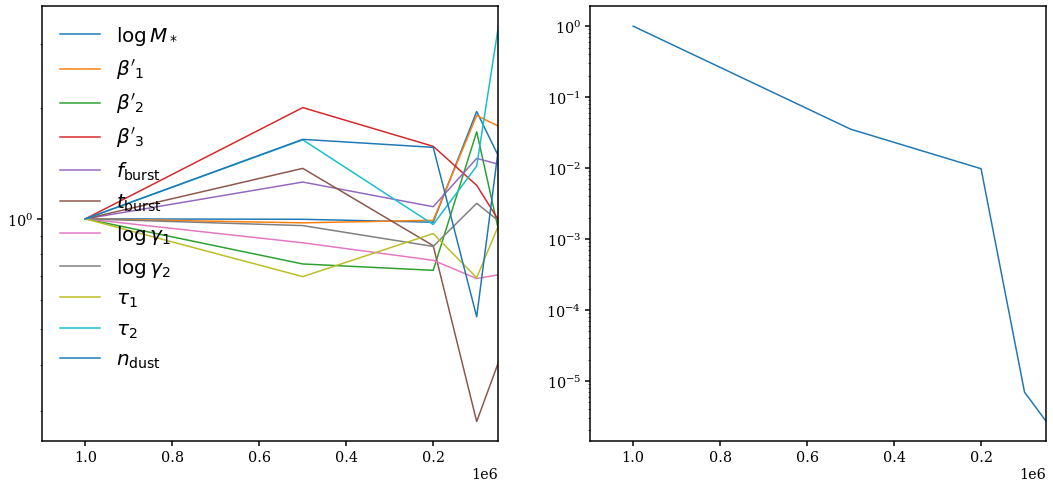

500x10.4 0.008902312488576553
ntrain500000.500x10.4 0.000640318356547961
ntrain200000.500x10.4 3.552614971938628e-05
ntrain100000.500x10.4 0.0011758476674435187
ntrain50000.500x10.4 1.701155617306578e-08
[6.40318357e-04 3.55261497e-05 1.17584767e-03 1.70115562e-08]
0.008902312488576553
[6.40318357e-04 3.55261497e-05 1.17584767e-03 1.70115562e-08]
[1.00000000e+00 7.19271939e-02 3.99066532e-03 1.32083396e-01
 1.91091429e-06]


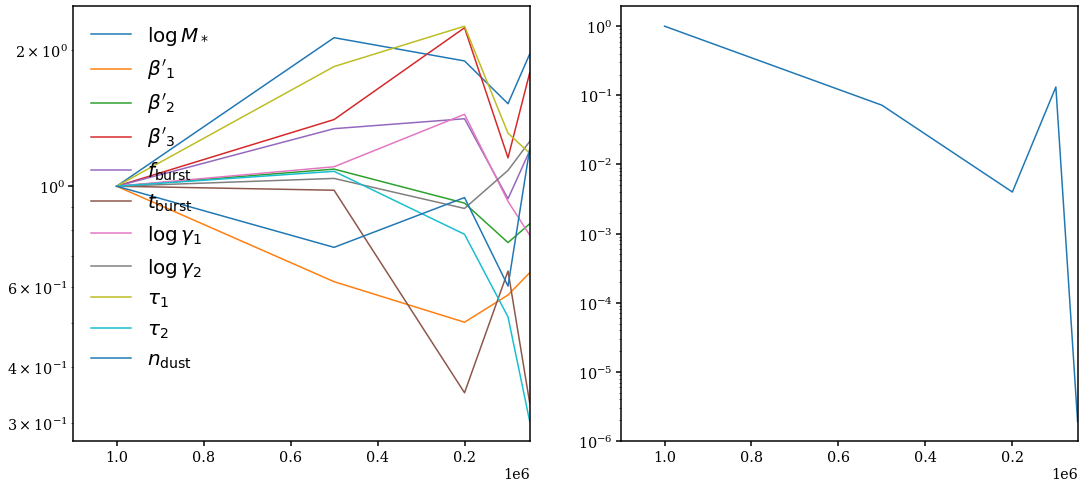

In [23]:
# architectures
archs = ['500x10.0', '500x10.1', '500x10.2', '500x10.3', '500x10.4']
nhidden = [500 for arch in archs]
nblocks = [10 for arch in archs]

ks_pvalues, ks_tot_pvalues = [], [] 
for i in range(len(archs)): 
    anpe_samples = np.load('/scratch/network/chhahn/sedflow/anpe_thetaunt_magsigz.toy.%s.samples.npy' % archs[i])
    
    _pp, _rank = pps(anpe_samples, ntest=1000, nmcmc=10000)
    
    ks_p = []
    for ii in range(_pp.shape[1]): 
        _, _ks_p = stats.kstest(_pp[ii], 'uniform')
        ks_p.append(_ks_p)
    ks_pvalues.append(np.array(ks_p))
    
    _, _ks_tot_p = stats.kstest(_pp.flatten(), 'uniform')
    ks_tot_pvalues.append(_ks_tot_p)
    print(archs[i], _ks_tot_p)
    
    ks_all_p_nt, ks_tot_p_nt = [], []
    for ntrain in [500000, 200000, 100000, 50000]: 
        anpe_samples = np.load('/scratch/network/chhahn/sedflow/anpe_thetaunt_magsigz.toy.ntrain%i.%s.samples.npy' % (ntrain, archs[i]))

        _pp_nt, _rank_nt = pps(anpe_samples, ntest=1000, nmcmc=10000)

        ks_p_nt = []
        for ii in range(_pp_nt.shape[1]): 
            _, _ks_p = stats.kstest(_pp_nt[ii], 'uniform')
            ks_p_nt.append(_ks_p)
        ks_all_p_nt.append(ks_p_nt)
        
        _, _ks_tot_p_nt = stats.kstest(_pp_nt.flatten(), 'uniform')
        print('ntrain%i.%s' % (ntrain, archs[i]), _ks_tot_p_nt)        
        ks_tot_p_nt.append(_ks_tot_p_nt)
    ks_all_p_nt = np.array(ks_all_p_nt)
    ks_tot_p_nt = np.array(ks_tot_p_nt)
    print(ks_tot_p_nt)
    
    theta_lbls = [r'$\log M_*$', r"$\beta'_1$", r"$\beta'_2$", r"$\beta'_3$", r'$f_{\rm burst}$', r'$t_{\rm burst}$', r'$\log \gamma_1$', r'$\log \gamma_2$', r'$\tau_1$', r'$\tau_2$', r'$n_{\rm dust}$']
    fig = plt.figure(figsize=(18,8))
    sub = fig.add_subplot(121)
    for itheta in range(_pp.shape[1]): 
        sub.plot([1e6, 500000, 200000, 100000, 50000], np.array([ks_p[itheta]] + list(ks_all_p_nt[:,itheta]))/ks_p[itheta], label=theta_lbls[itheta])
    sub.legend(loc='upper left', fontsize=20)
    sub.set_xlim(1.1e6, 5e4)
    sub.set_yscale('log')

    sub = fig.add_subplot(122)
    print(_ks_tot_p)
    print(ks_tot_p_nt)
    print(np.array([_ks_tot_p] + list(ks_tot_p_nt))/_ks_tot_p)
    sub.plot([1e6, 500000, 200000, 100000, 50000], np.array([_ks_tot_p] + list(ks_tot_p_nt))/_ks_tot_p)
    sub.set_xlim(1.1e6, 5e4)
    sub.set_yscale('log')
    plt.show()